# Project Description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do we know if a customer is no longer with us? We can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: follower might have gotten bored and left.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

# Project Goal

-  To analyze and come up with a customer retention strategy.
-  Learn to predict the probability of churn (for the upcoming month) for each customer
-  Draw up typical user portraits: select the most outstanding groups and describe their main features
-  Analyze the factors that impact churn most
-  Draw basic conclusions and develop recommendations on how to improve customer service:
    -  Identify target groups
    -  Suggest measures to cut churn
    -  Describe any other patterns you see with respect to interaction with customers

# Project Contents

-  <a href='#the_destination1'>Download the data:</a>
-  <a href='#the_destination2'>Carry out exploratory data analysis (EDA):</a>
-  <a href='#the_destination3'>Build a model to predict user churn:</a>
-  <a href='#the_destination4'>Create user clusters:</a>
-  <a href='#the_destination5'>Come up with conclusions and basic recommendations on working with customers:</a>
-  <a href='#the_destination6'>Overall conclusion:</a> 

<a id='the_destination1'></a>
# Step 1. Download the data

**Importing the libraries:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import KMeans

**Information for the "gym_churn_us" dataset:**

In [2]:
try:
    gym_churn_us = pd.read_csv('gym_churn_us.csv')
except:
    gym_churn_us = pd.read_csv('/datasets/gym_churn_us.csv')
gym_churn_us.info()
display(gym_churn_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In the "gym_churn_us" dataset, there are 4000 rows and 15 columns. Columns name are "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Avg_additional_charges_total", "Month_to_end_contract", "Lifetime", "Avg_class_frequency_total", "Avg_class_frequency_current_month" and "Churn".

**Checking data types:**

In [3]:
gym_churn_us.dtypes

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

In the "gym_churn_us" dataset, "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Lifetime" and "Churn" columns are integer datatype. Rest of the columns are float datatypes.

Our data falls under two categories:
-  Categorical features: 'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits' and 'Churn'.
-  Numerical features: 'Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total' and 'Avg_class_frequency_current_month'.

-  In the "gym_churn_us" dataset, there are 4000 rows and 15 columns. Columns name are "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Avg_additional_charges_total", "Month_to_end_contract", "Lifetime", "Avg_class_frequency_total", "Avg_class_frequency_current_month" and "Churn".
-  In the "gym_churn_us" dataset, "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Lifetime" and "Churn" columns are integer datatype. Rest of the columns are float datatypes.
-  Our data falls under two categories:
-  Categorical features: 'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits' and 'Churn'.
-  Numerical features: 'Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total' and 'Avg_class_frequency_current_month'.

<a id='the_destination2'></a>
# Step 2. Carry out exploratory data analysis (EDA)

**Checking missing values in the 'gym_churn_us' dataset:**

In [4]:
gym_churn_us.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In the "gym_churn_us" dataset, there are no missing values.

**Determining the numbe rof male and female:**

In [5]:
gym_churn_us['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

Considering 1 value for male and 0 value for female we can say that the number of male is more compared to female.

**Determining the number of churn customer:**

In [6]:
gym_churn_us['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Considering the 0 value for chuen left and 1 value for churn stayed we can say that more customers are left compared to the customers who stayed.

**Study the mean values and standard deviation:**

In [7]:
gym_churn_us.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


-  Mean is for gender 0.510250, Near_Location 0.845250, Partner 0.486750, Promo_friends 0.308500, Phone 0.903500, Contract_period 4.681250, Group_visits 0.412250, Age 29.184250, Avg_additional_charges_total 146.943728, Month_to_end_contract 4.322750, Lifetime 3.724750, Avg_class_frequency_total 1.879020, Avg_class_frequency_current_month	1.767052 and Churn 0.265250.
-  Standard deviation is for gender 0.499957, Near_Location 0.361711, Partner 0.499887, Promo_friends 0.461932, Phone 0.295313, Contract_period 4.549706, Group_visits 0.492301, Age 3.258367, Avg_additional_charges_total 96.355602, Month_to_end_contract 4.191297, Lifetime 3.749267, Avg_class_frequency_total 0.972245, Avg_class_frequency_current_month 1.052906 and Churn 0.441521.

**Determining the mean feature values in two groups:**

In [8]:
gym_churn_us.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


The 'gym_churn_us' dataset is divided into two parts for those who left (churn = 0) and for those who stayed (churn = 1).

**Determining churn customer histogram:**

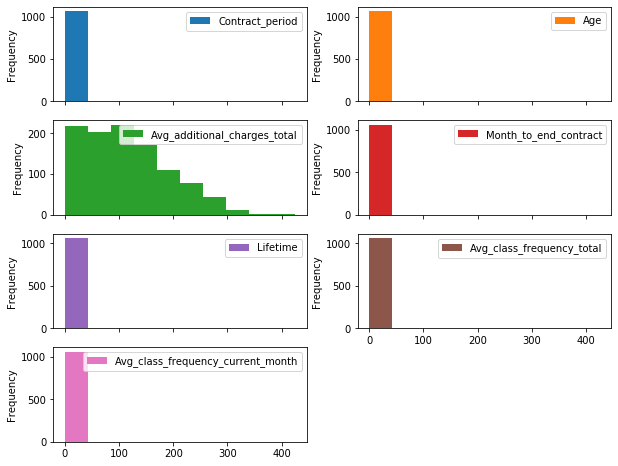

In [9]:
churn_customers = gym_churn_us[gym_churn_us["Churn"] == 1]
churn_customers_not = gym_churn_us[gym_churn_us["Churn"] == 0]
cols = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
churn_customers[cols].plot.hist(subplots = True, layout=(4, 2), figsize=(10,8))
plt.show()

**Determining not churn customers histogram:**

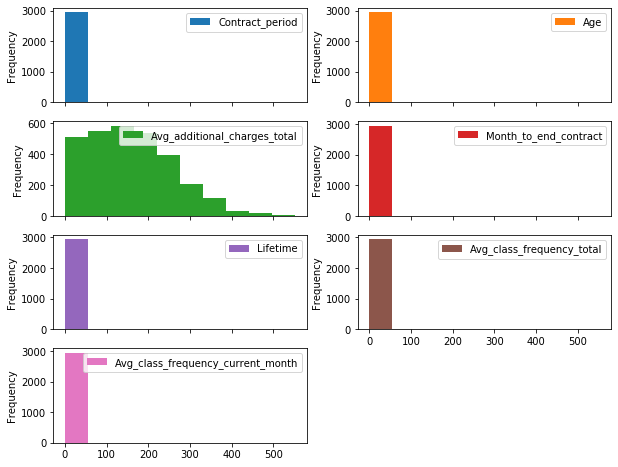

In [10]:
cols = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
churn_customers_not[cols].plot.hist(subplots = True, layout=(4, 2), figsize=(10,8))
plt.show()

From the above two histograms, we can conclude that for numerical features churn customers and not churn customers are equally distributed.

**Determining bar plot for categorical variables in churn customers and not churn customers:**

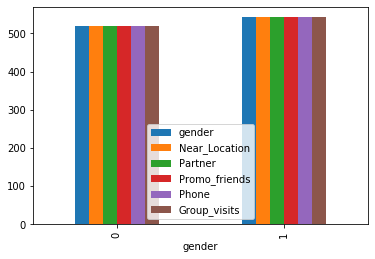

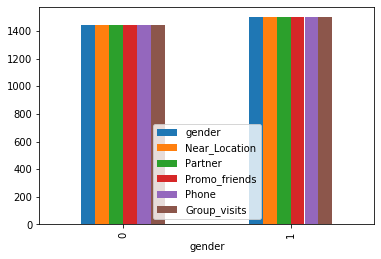

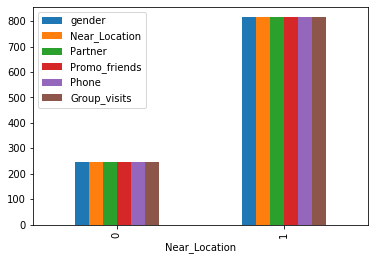

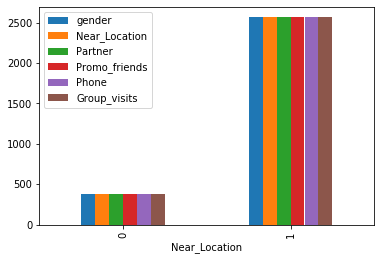

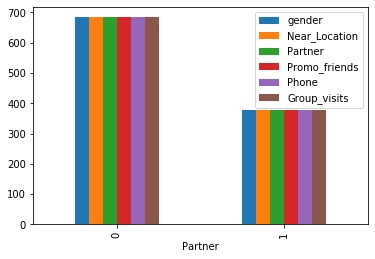

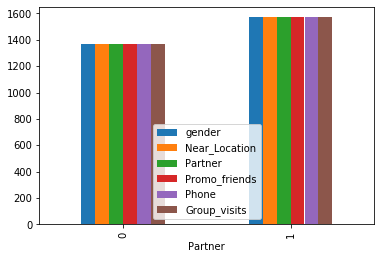

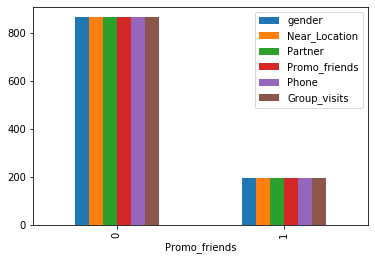

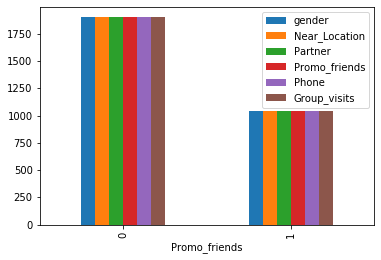

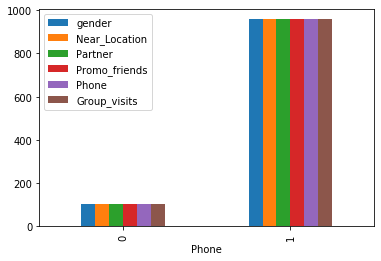

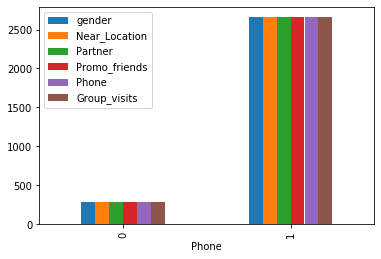

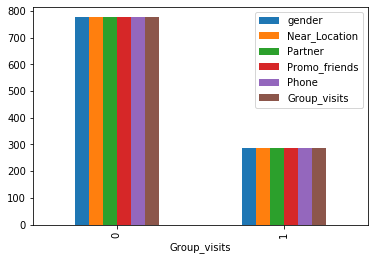

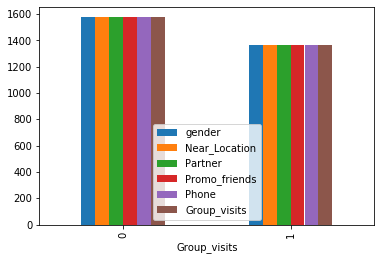

In [11]:
for column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']:
    churn_customers.groupby([column])['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'].count().plot(kind="bar")
    churn_customers_not.groupby([column])['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'].count().plot(kind="bar")

For categorical features churn customers and not churn customers 'gender' and 'phone' features are equally distributed but other features are not.

**Building a correlation matrix:**

In [12]:
corrMatrix = gym_churn_us.corr()
display(corrMatrix)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


We can see that the coefficient of correlation between the phone and contract_period variables is -0.006893. This indicates that there is a relatively weak, negative relationship between the two variables.

**Displaing a correlation matrix:**

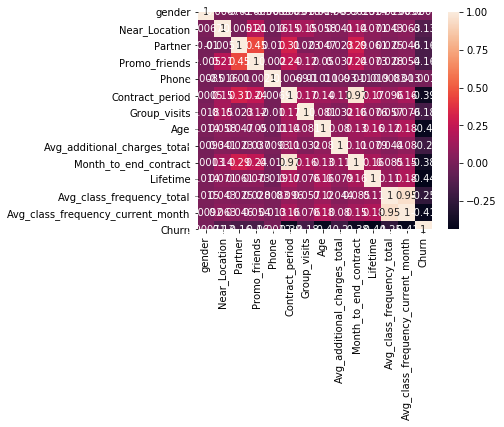

<Figure size 1800x1800 with 0 Axes>

In [13]:
sns.heatmap(corrMatrix, square = True, annot = True)
plt.figure(figsize = (25,25))
plt.show()

-  In the "gym_churn_us" dataset, there are no missing values.
-  Considering 1 value for male and 0 value for female we can say that the number of male is more compared to female.
-  Considering the 0 value for chuen left and 1 value for churn stayed we can say that more customers are left compared to the customers who stayed.
-  Mean is for gender 0.510250, Near_Location 0.845250, Partner 0.486750, Promo_friends 0.308500, Phone 0.903500, Contract_period 4.681250, Group_visits 0.412250, Age 29.184250, Avg_additional_charges_total 146.943728, Month_to_end_contract 4.322750, Lifetime 3.724750, Avg_class_frequency_total 1.879020, Avg_class_frequency_current_month	1.767052 and Churn 0.265250.
-  Standard deviation is for gender 0.499957, Near_Location 0.361711, Partner 0.499887, Promo_friends 0.461932, Phone 0.295313, Contract_period 4.549706, Group_visits 0.492301, Age 3.258367, Avg_additional_charges_total 96.355602, Month_to_end_contract 4.191297, Lifetime 3.749267, Avg_class_frequency_total 0.972245, Avg_class_frequency_current_month 1.052906 and Churn 0.441521.
-  The 'gym_churn_us' dataset is divided into two parts for those who left (churn = 0) and for those who stayed (churn = 1).
-  From the above two histograms, we can conclude that for numerical features churn customers and not churn customers are equally distributed.
-  For categorical features churn customers and not churn customers 'gender' and 'phone' features are equally distributed but other features are not.
-  We can see that the coefficient of correlation between the phone and contract_period variables is -0.006893. This indicates that there is a relatively weak, negative relationship between the two variables.

<a id='the_destination3'></a>
# Step 3. Build a model to predict user churn

**Dividing the data into train and validation sets using the train_test_split() function:**

In [14]:
X = gym_churn_us.drop('Churn', axis = 1)
y = gym_churn_us['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Defining the logistic regression model, training and forcasting:**

In [15]:
warnings.filterwarnings('ignore')
model_LR = LogisticRegression(random_state=0)
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)

**Defining the random forest model, training and forcasting:**

In [16]:
model_RF = (RandomForestClassifier(random_state=0))
model_RF.fit(X_train, y_train) 
predictions_RF = model_RF.predict(X_test)

**Printing the metrics for the resulting prediction of logistic Regression model:**

In [17]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_LR)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_LR)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_LR)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_LR)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


Logistic regression model has accuracy 93%, precision 86%, reacll 83% and F1 85%.

**Printing the metrics for the resulting prediction of random forest model:**

In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_RF)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_RF)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_RF)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_RF)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.78
F1: 0.81


Random forest model has accuracy 91%, precision 83%, reacll 78% and F1 81%.

Comapring with the logistic regression model and random forest model, we can say that logistic regression model gives us better accuracy, precision, recall and F1 score. 

-  Logistic regression model has accuracy 93%, precision 86%, reacll 83% and F1 85%.
-  Random forest model has accuracy 91%, precision 83%, reacll 78% and F1 81%.
-  Comapring with the logistic regression model and random forest model, we can say that logistic regression model gives us better accuracy, precision, recall and F1 score.

<a id='the_destination4'></a>
# Step 4. Create user clusters

**Standardize the data:**

In [19]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(gym_churn_us)

**Building a matrix of distances based on the standardized feature matrix and plotting a dendrogram:**

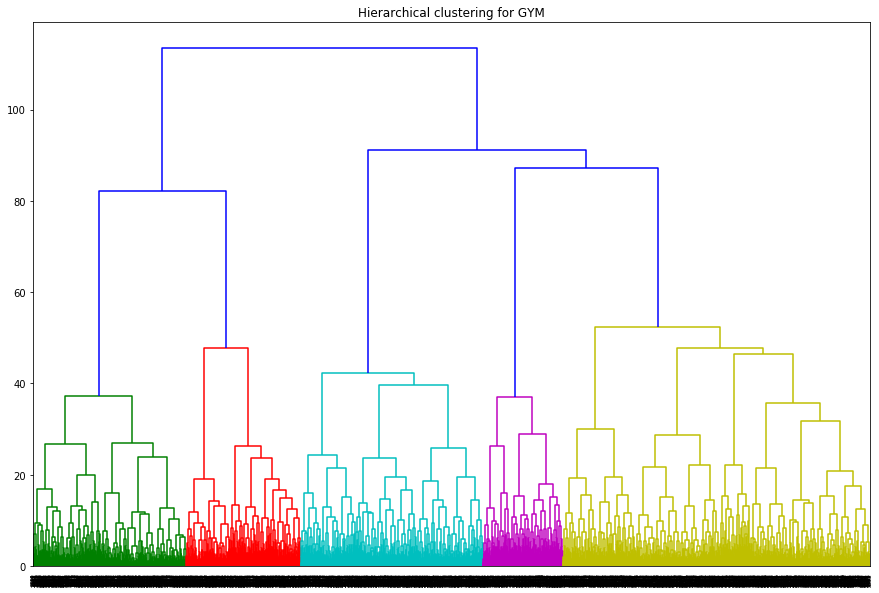

In [20]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

The suggested optimal number of clusters (5) corresponds to the five different colors on the plot.

**Training the clustering model with the K-means algorithm and predict customer clusters:**

In [21]:
km = KMeans(n_clusters = 5)
km.fit(X)
labels = km.fit_predict(x_sc)

**Determining the mean feature values for clusters:**

In [22]:
# store cluster labels in the field of our dataset
gym_churn_us['cluster_km'] = labels
# get the statistics of the mean feature values per cluster
gym_churn_us.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.526042,0.867188,0.471354,0.307292,0.000000,4.796875,0.429688,29.328125,144.408268,4.484375,3.960938,1.862114,1.731358,0.263021
1,0.514034,0.999198,0.337610,0.219727,1.000000,2.298316,0.448276,30.176423,160.280025,2.162791,4.867682,2.123560,2.125643,0.003208
2,0.509138,1.000000,0.332898,0.227154,1.000000,1.647520,0.284595,26.912533,115.138263,1.595300,1.060052,1.403715,1.007961,0.933420
3,0.507380,0.955720,0.784133,0.579336,1.000000,10.671587,0.548893,29.903137,160.191701,9.714945,4.636531,2.012441,2.007485,0.013838
4,0.497110,0.000000,0.462428,0.077071,0.996146,2.287091,0.215800,28.545279,136.048617,2.156069,2.832370,1.726813,1.550053,0.435453


- In cluster 2, age between 26 and 27 customers are more likely stayed in churn and that is almost 100%.
- In cluster 5, 76% of the the user is an employee of a partner company.
- From all of the five clusters we can see almost 50% are male and 50% are female.
- Except cluster 2 , other clusters has lifetime  value 4 months.

**Plotting the distributions of features for the clusters:**

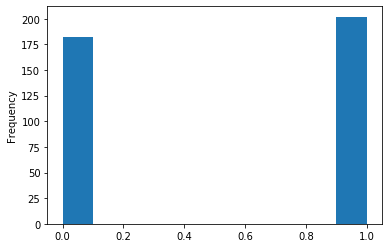

In [23]:
gym_churn_us[gym_churn_us['cluster_km'] == 0].gender.plot.hist()
plt.show()

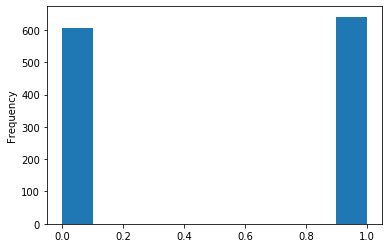

In [24]:
gym_churn_us[gym_churn_us['cluster_km'] == 1].gender.plot.hist()
plt.show()

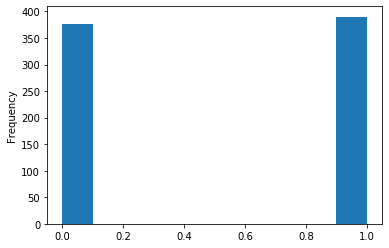

In [25]:
gym_churn_us[gym_churn_us['cluster_km'] == 2].gender.plot.hist()
plt.show()

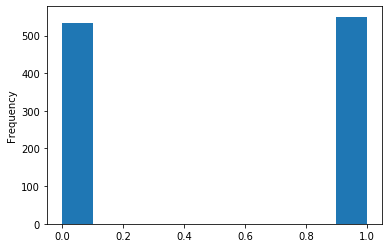

In [26]:
gym_churn_us[gym_churn_us['cluster_km'] == 3].gender.plot.hist()
plt.show()

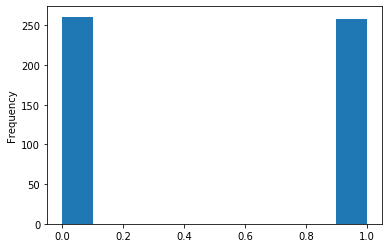

In [27]:
gym_churn_us[gym_churn_us['cluster_km'] == 4].gender.plot.hist()
plt.show()

Cluster 2 and cluster 5 have the same number of male and female customers.

**Calculating the churn rate for each cluster:**

In [28]:
churn_count = gym_churn_us.groupby('cluster_km').sum()["Churn"]
churn_total = gym_churn_us.groupby('cluster_km').count()["Churn"]
churn_rate = churn_count / churn_total
print(churn_rate)

cluster_km
0    0.263021
1    0.003208
2    0.933420
3    0.013838
4    0.435453
Name: Churn, dtype: float64


Cluster 2 has churn rate almost 100% but the other clusters churn rate is very rare compared to the claster 2.

-  The suggested optimal number of clusters (5) corresponds to the five different colors on the plot.
- In cluster 2, age between 26 and 27 customers are more likely stayed in churn and that is almost 100%.
- In cluster 5, 76% of the the user is an employee of a partner company.
- From all of the five clusters we can see almost 50% are male and 50% are female.
-  Cluster 2 and cluster 5 have the same number of male and female customers.
- Except cluster 2 , other clusters has lifetime  value 4 months.
-  Cluster 2 has churn rate almost 100% but the other clusters churn rate is very rare compared to the claster 2.

<a id='the_destination5'></a>
# Step 5. Come up with conclusions and basic recommendations on working with customers

-  Although age between 26 and 27 customers are more likely to stay with churn. So on business purpose we should do marketing for incresing customers with the other aged customers except 26 and 27. 
-  Cluster 2 has lifetime value is less than one month. So we should try to reach 4 moths like other clusters.
- In cluster 1, cluster 2, cluster 3, cluster 4, cluster 5 have 46%, 34%, 44%, 37%, 76% of the user is an employee of a partner company.We should try to increse user for cluster 1, cluster 2, cluster 3, cluster 4 an employee of a partner company like cluster 5.

<a id='the_destination6'></a>
# Step 6. Overall conclusion

-  In the "gym_churn_us" dataset, there are 4000 rows and 15 columns. Columns name are "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Avg_additional_charges_total", "Month_to_end_contract", "Lifetime", "Avg_class_frequency_total", "Avg_class_frequency_current_month" and "Churn".
-  In the "gym_churn_us" dataset, "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Contract_period", "Group_visits", "Age", "Lifetime" and "Churn" columns are integer datatype. Rest of the columns are float datatypes.
-  Our data falls under two categories:
-  Categorical features: 'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits' and 'Churn'.
-  Numerical features: 'Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract','Lifetime', 'Avg_class_frequency_total' and 'Avg_class_frequency_current_month'.
-  In the "gym_churn_us" dataset, there are no missing values.
-  Considering 1 value for male and 0 value for female we can say that the number of male is more compared to female.
-  Considering the 0 value for chuen left and 1 value for churn stayed we can say that more customers are left compared to the customers who stayed.
-  Mean is for gender 0.510250, Near_Location 0.845250, Partner 0.486750, Promo_friends 0.308500, Phone 0.903500, Contract_period 4.681250, Group_visits 0.412250, Age 29.184250, Avg_additional_charges_total 146.943728, Month_to_end_contract 4.322750, Lifetime 3.724750, Avg_class_frequency_total 1.879020, Avg_class_frequency_current_month	1.767052 and Churn 0.265250.
-  Standard deviation is for gender 0.499957, Near_Location 0.361711, Partner 0.499887, Promo_friends 0.461932, Phone 0.295313, Contract_period 4.549706, Group_visits 0.492301, Age 3.258367, Avg_additional_charges_total 96.355602, Month_to_end_contract 4.191297, Lifetime 3.749267, Avg_class_frequency_total 0.972245, Avg_class_frequency_current_month 1.052906 and Churn 0.441521.
-  The 'gym_churn_us' dataset is divided into two parts for those who left (churn = 0) and for those who stayed (churn = 1).
-  From the above two histograms, we can conclude that for numerical features churn customers and not churn customers are equally distributed.
-  For categorical features churn customers and not churn customers 'gender' and 'phone' features are equally distributed but other features are not.
-  We can see that the coefficient of correlation between the phone and contract_period variables is -0.006893. This indicates that there is a relatively weak, negative relationship between the two variables.
-  Logistic regression model has accuracy 93%, precision 86%, reacll 83% and F1 85%.
-  Random forest model has accuracy 91%, precision 83%, reacll 78% and F1 81%.
-  Comapring with the logistic regression model and random forest model, we can say that logistic regression model gives us better accuracy, precision, recall and F1 score.
-  The suggested optimal number of clusters (5) corresponds to the five different colors on the plot.
- In cluster 2, age between 26 and 27 customers are more likely stayed in churn and that is almost 100%.
- In cluster 5, 76% of the the user is an employee of a partner company.
- From all of the five clusters we can see almost 50% are male and 50% are female.
-  Cluster 2 and cluster 5 have the same number of male and female customers.
- Except cluster 2 , other clusters has lifetime  value 4 months.
-  Cluster 2 has churn rate almost 100% but the other clusters churn rate is very rare compared to the claster 2.
-  Although age between 26 and 27 customers are more likely to stay with churn. So on business purpose we should do marketing for incresing customers with the other aged customers except 26 and 27. 
-  Cluster 2 has lifetime value is less than one month. So we should try to reach 4 moths like other clusters.
- In cluster 1, cluster 2, cluster 3, cluster 4, cluster 5 have 46%, 34%, 44%, 37%, 76% of the user is an employee of a partner company.We should try to increse user for cluster 1, cluster 2, cluster 3, cluster 4 an employee of a partner company like cluster 5.